#### Numerical integration example

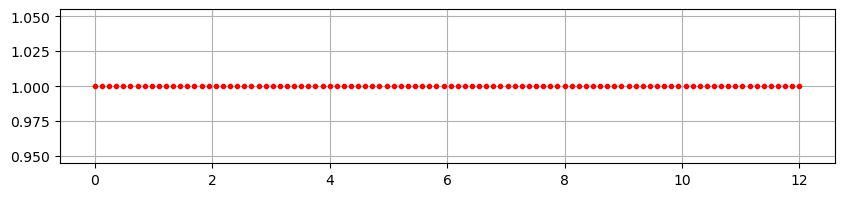

In [1]:
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt

# Create uniform grid
n_zV = 100

# Vapour length in m
l_V = 12

# Number of elements
z_grid = np.linspace(0, l_V,n_zV)


# Visualise grid
plt.figure(figsize=[10,2])
plt.plot(z_grid, np.ones(len(z_grid)), 'r.')
plt.grid()
plt.show()



We illustrate the Simpson's rule to compute the following integral

$$ \int_0^{12} x^2 dx = \frac{x^3}{3} |_0^{12} = \frac{12^3}{3} = 576 $$

In [2]:
# Generate grid 
y = z_grid**2

# Compute integral
simps(y, z_grid)

576.0002968157238

1-D vapour temperature average

$$ \frac{1}{l_V} \int_0^{l_V} T(z) dz $$

In [3]:
# Open source Coolprop module
import CoolProp.CoolProp as CP

In [4]:
P = 101325
fluid = 'hydrogen'
CP.PropsSI('D','P',P,'Q',1,fluid)

1.3321703279411183

In [5]:
T_sat = CP.PropsSI('T','P',P,'Q',1,fluid)

T_V = np.linspace(T_sat+1e-3, T_sat + 20, 100)

In [6]:
# Coolprop can operate in a vectorised form
rho_V = CP.PropsSI('D','P',P,'T',T_V,fluid)

# Vapour length
l_V = z_grid[-1]-z_grid[0]

# Average vapour density
rho_V_avg = 1/l_V * simps(rho_V, z_grid)
rho_V_avg

0.8787496959856409

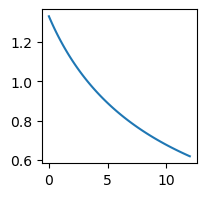

In [7]:
plt.figure(figsize =[2,2])
plt.plot(z_grid, rho_V)

plt.show()

In [8]:
# Velocity profile for spherical tanks

# Vapour velocity at the interphase
v_z0 = 1 # m/s



2